In [1]:
#IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
import scipy.stats as stats
from scipy.stats import norm 
from scipy.stats import binom
from scipy.stats import poisson,geom
from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF

In [2]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
To: C:\Users\Dell\aerofit_treadmill.csv

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<?, ?B/s]


# Defining Problem Statement and Analysing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

# Problem Statement: To identify the characteristics of the target audience for each type of treadmill offered by the company.To provide the better recommendation of the treadmills to the new customers. Investigate if there are differences across the product with respect to customer characteristics.

#1.It will be achieved by doing descriptive analysis and creating profile of different customers. For each type of product by developing different types of charts and tables.
2.The fro 2 way contingency table (.crosstab) and find insights and recommendation through calculating all type of conditional and marginal probabilities.

In [3]:
df = pd.read_csv("C:/Users/Dell/aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.shape

(180, 9)

Actually aerofit_treadmill.csv have very short and clean data.
It is having 180 rows and 9 columns
It contains info about 3 types of treadmills and their usage and performance.
includes columns like ["Product","Age","Gender","Education","MaritalStatus","Usage","Fitness","Income","Miles"]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


df.info() shows that we have columns Age,Education,Usage,Fitness,Income,Miles as Numerical one. i.e. int64.
and other Product, Gender, Marital_status are categorical i.e. object.
We have no null values present in any of the columns.

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


df.describe() describes Numerical columns as count,mean.std,min,25%,50%,75%,and max.

In [7]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


df.describe(include='object') describes categorical columns like Product , Gender, Marital status.
Product:
    Total count 180
    3 unique [KP281,KP481,KP781]
    Top frequent KP281
    with freq 80
Gender:
    Total count 180
    2 unique [Male,Female]
    Top frequent Male
    with freq 104
Product:
    Total count 180
    2 unique [single,Partnered]
    Top frequent partnered
    with freq 107

# Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [8]:
def fitness_types(val):
    if val == 1:
        return "Poor"
    elif val == 2:
        return "OK"
    elif val == 3:
        return "Average"
    elif val == 4:
        return "Good"
    else:
        return "Excellent"
df["fitness_type"] = df["Fitness"].apply(fitness_types)
##Sample space = ("Poor","OK","Average",Good","Excellent")

<AxesSubplot:>

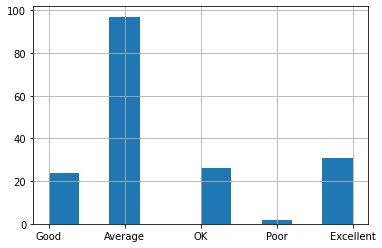

In [9]:
df["fitness_type"].hist()

In [10]:
def Age_category(val):
    if 18 <= val <= 25:
        return "Youth(18_to_25)"
    elif 26 <= val <= 40:
        return "Grown Ups(26_to_40)"
    elif 41 <= val:
        return "Adults(40_to_58)"
df["Age_category"] = df["Age"].apply(Age_category)
##Sample space = ("Youth","Grown Ups","Adults")
#call hist to visualise

<AxesSubplot:>

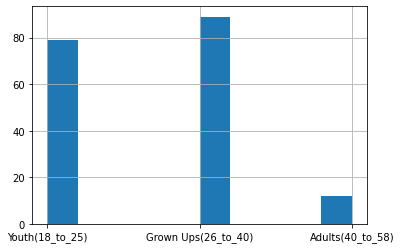

In [11]:
df["Age_category"].hist()

In [12]:
def usage_types(val):
    if val < 3 :
        return "Low Usage"
    elif val == 3:
        return "Moderate Usage"
    else:
        return "High Usage"
df["Usage_type"] = df["Usage"].apply(usage_types)
##Sample space = ("Low Usage","moderate Usage", "High Usage")

<AxesSubplot:>

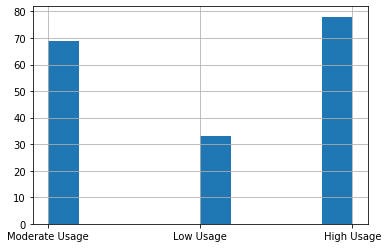

In [13]:
df["Usage_type"].hist()

<AxesSubplot:>

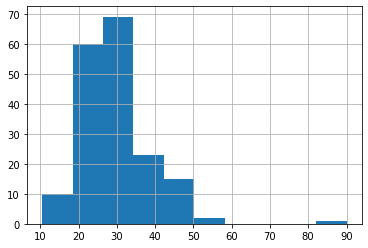

In [14]:
df["miles_per_usage"] = np.round(df["Miles"]/df["Usage"],2)
#df.head(20)
df["miles_per_usage"].hist()

In [15]:
#changing it from object dtype to category  to save memory
df["Product"]=df["Product"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["fitness_type"]=df["fitness_type"].astype("category")
df["Age_category"]=df["Age_category"].astype("category")
df["Usage_type"]=df["Usage_type"].astype("category")

# Product KP281

In [16]:
df_KP281 = df[df["Product"] == "KP281"]
df_KP281.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.55000,7.221452,18.00,23.0,26.000,33.00,50.0
Education,80.0,15.03750,1.216383,12.00,14.0,16.000,16.00,18.0
Usage,80.0,3.08750,0.782624,2.00,3.0,3.000,4.00,5.0
Fitness,80.0,2.96250,0.664540,1.00,3.0,3.000,3.00,5.0
Income,80.0,46418.02500,9075.783190,29562.00,38658.0,46617.000,53439.00,68220.0
Miles,80.0,82.78750,28.874102,38.00,66.0,85.000,94.00,188.0
miles_per_usage,80.0,27.11275,7.559302,11.75,22.0,26.875,28.33,56.5


In [17]:
df_KP281.describe(include = 'category').T

,count,unique,top,freq
Product,80,1,KP281,80
Gender,80,2,Female,40
MaritalStatus,80,2,Partnered,48
fitness_type,80,5,Average,54
Age_category,80,3,Grown Ups(26_to_40),40
Usage_type,80,3,Moderate Usage,37


# Product KP481

In [18]:
df_KP481 = df[df["Product"] == "KP481"]
df_KP481.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.00,26.00,33.2500,48.0
Education,60.0,15.116667,1.222552,12.0,14.00,16.00,16.0000,18.0
Usage,60.0,3.066667,0.799717,2.0,3.00,3.00,3.2500,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.00,3.00,3.0000,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.50,49459.50,53439.0000,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.00,85.00,106.0000,212.0
miles_per_usage,60.0,28.687833,7.589197,10.5,21.33,28.33,31.8125,42.5


In [19]:
df_KP481.describe(include = 'category').T

,count,unique,top,freq
Product,60,1,KP481,60
Gender,60,2,Male,31
MaritalStatus,60,2,Partnered,36
fitness_type,60,4,Average,39
Age_category,60,3,Grown Ups(26_to_40),30
Usage_type,60,3,Moderate Usage,31


# KP781

In [20]:
df_KP781 = df[df["Product"] == "KP781"]
df_KP781.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.1000,6.971738,22.0,24.7500,27.0,30.25,48.0
Education,40.0,17.3250,1.639066,14.0,16.0000,18.0,18.00,21.0
Usage,40.0,4.7750,0.946993,3.0,4.0000,5.0,5.00,7.0
Fitness,40.0,4.6250,0.667467,3.0,4.0000,5.0,5.00,5.0
Income,40.0,75441.5750,18505.836720,48556.0,58204.7500,76568.5,90886.00,104581.0
Miles,40.0,166.9000,60.066544,80.0,120.0000,160.0,200.00,360.0
miles_per_usage,40.0,35.0975,11.970659,20.0,26.3025,32.0,40.00,90.0


In [21]:
df_KP781.describe(include = 'category').T

,count,unique,top,freq
Product,40,1,KP781,40
Gender,40,2,Male,33
MaritalStatus,40,2,Partnered,23
fitness_type,40,3,Excellent,29
Age_category,40,3,Grown Ups(26_to_40),19
Usage_type,40,2,High Usage,39


In [22]:
df_KP781.describe(include = "category").T

,count,unique,top,freq
Product,40,1,KP781,40
Gender,40,2,Male,33
MaritalStatus,40,2,Partnered,23
fitness_type,40,3,Excellent,29
Age_category,40,3,Grown Ups(26_to_40),19
Usage_type,40,2,High Usage,39


In [23]:
df_male = df[df["Gender"] == "Male"]
#df_male.head()
df_female = df[df["Gender"] == "Female"]
#df_male.head()


In [24]:
df_single = df[df["MaritalStatus"] == "Single"]
#df_single.head()
df_Partnered = df[df["MaritalStatus"] == "Partnered"]
#df_single.head()


In [25]:
prob_female = 76/180
#prob_female
prob_female_KP281 = 40/180
#prob_female_KP281
prob_female_KP481 = 29/180
#prob_female_KP481
prob_female_KP781 = 7/180
#prob_female_KP781

In [26]:
prob_male = 104/180
prob_male
prob_male_KP281 = 40/180
#prob_male_KP281
prob_male_KP481 = 31/180
#prob_male_KP481
prob_male_KP781 =33/180
#prob_male_KP781

In [27]:
for i in df.columns:
  print(f'{i} has {df[i].nunique()} unique values')

Product has 3 unique values
Age has 32 unique values
Gender has 2 unique values
Education has 8 unique values
MaritalStatus has 2 unique values
Usage has 6 unique values
Fitness has 5 unique values
Income has 62 unique values
Miles has 37 unique values
fitness_type has 5 unique values
Age_category has 3 unique values
Usage_type has 3 unique values
miles_per_usage has 55 unique values


From df.columns.nunique() we can say that no identifier or primary key present in the data but the highest range is in the income column

In [28]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("------------")
    print(df.iloc[:,i].value_counts())
    print("---------------------------")


Product
------------
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
---------------------------
Age
------------
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
---------------------------
Gender
------------
Male      104
Female     76
Name: Gender, dtype: int64
---------------------------
Education
------------
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
---------------------------
MaritalStatus
------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
---------------------------
Usage
------------
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
---------------------------
Fitness
------------
3    97
5

Questionnaire Q no. 1:
The overall probability of purchase of different treadmills is:
    P[K281] = 80 / 180 = 0.44
    P[K481] = 60 / 180 = 0.33
    P[K781] = 40 / 180 = 0.22

from df.columns.value_counts) we can infer that
1.Product: 
    KP281 is having highest usage which is an entry level treadmill and having lowest cost $1500
2.Age: 
    Mostly Youth population is using the product age ranges from 23 to 26 and max age among user is 50. Its good to see that at this age also some people are health countious. Keep it up. Very well done
3.Gender:
    Most users are Male.
4.Education:
     Users are mid level of educated people not highly educated and not low level. Those are in range of 14 to 18
5.Marital Status:
    Number of partnered users is more with the count of 107 out of 180
6.Usage:
    Most Customers use treadmills for 2,3,4 times a week. Rather we can say that people use it on alternate day basis .
7:Fitness:
    We can infer from Fitness that is self rating that most fitness cauntious people having rated themselves 5 use it to maintain themselves with the count 31 and medium level ranked 3 are trying very hard to reach to fitness level with the count 97.
    Also 2 and 4 rated are average users with the count 24 26.
    One more thing to notice is poor level fitness people i.e. 1 they find it difficult to use it more due to stamina issue.
8:Income:
    Most users are having income 45484 with the count 14. 
    Actually people with more than 45K salary to around 50K can afford it to use for their fitness purpose.
9:Miles:
    Each week people manage to walk mostly around 65 to 95 miles.

In [29]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("------------")
    print(df.iloc[:,i].value_counts(normalize = True)*100)
    print("---------------------------")


Product
------------
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64
---------------------------
Age
------------
25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42     0.555556
Name: Age, dtype: float64
---------------------------
Gender
------------
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64
---------------------------
Education
------------
16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Educati

Here we can talk and compare on percent base each column as Normalized the data.
1.Product:
    Maximum 44.44% is KP281 with lowest price 1500$ is used.
    where as KP481  used by 33.33% people and KP781 using least 22.22% which is the most expensive with the cost2500$
2.Age:
    13.88% among users are of age 25 where as 10% among users are of age 23.
    Mostly users between age 23 to 28 are there which are around 50% of total users.
3.Gender:
    57.77% are male users.
    42.22% are female users.
4.Education:
    People having education between 14 to 16 years forms the most part of around 90% and above among all.
5.Marital Status:
    60% Married people and 40% single people are using it.
6.Usage:
    Most users are using it alternate days like 3 or 4 days per week.In total 70% of total users
7.Fitness:
    Medium level fitness people i.e.3 are trying really hard to reach to finess level are around 54%
    and Already fit people having scale 5 are stuggling to amintain it with 17.2% count.
8.Income:
    Most of the user like 7 to 8 % of all users have invome of around 45K$ PA
9.Miles:
    On an average 40% people managed to cover 85 to 95 miles of walk on treadmill per week.

In [30]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("------------")
    print(df.iloc[:,i].unique())
    print("---------------------------")


Product
------------
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
---------------------------
Age
------------
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
---------------------------
Gender
------------
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
---------------------------
Education
------------
[14 15 12 13 16 18 20 21]
---------------------------
MaritalStatus
------------
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
---------------------------
Usage
------------
[3 2 4 5 6 7]
---------------------------
Fitness
------------
[4 3 2 1 5]
---------------------------
Income
------------
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    category
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   fitness_type     180 non-null    category
 10  Age_category     180 non-null    category
 11  Usage_type       180 non-null    category
 12  miles_per_usage  180 non-null    float64 
dtypes: category(6), float64(1), int64(6)
memory usage: 11.9 KB


# Product KP281

In [32]:
df[df['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.55000,7.221452,18.00,23.0,26.000,33.00,50.0
Education,80.0,15.03750,1.216383,12.00,14.0,16.000,16.00,18.0
Usage,80.0,3.08750,0.782624,2.00,3.0,3.000,4.00,5.0
Fitness,80.0,2.96250,0.664540,1.00,3.0,3.000,3.00,5.0
Income,80.0,46418.02500,9075.783190,29562.00,38658.0,46617.000,53439.00,68220.0
Miles,80.0,82.78750,28.874102,38.00,66.0,85.000,94.00,188.0
miles_per_usage,80.0,27.11275,7.559302,11.75,22.0,26.875,28.33,56.5


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 80 customers purchased KP281 Model.
The average age of customers who bought KP281 is 28.5, whereas the min and max age is 18 and 50 respectively.
Average Education is 15 and median is 16.
Expected usage is 3 day a week


From the category table We can infer that most of the users are Female partnered., Having Average fitness_type and Age category is of Grown ups between 26 to 40 and Having moderate Usage.

# Product KP481

In [33]:
df[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.00,26.00,33.2500,48.0
Education,60.0,15.116667,1.222552,12.0,14.00,16.00,16.0000,18.0
Usage,60.0,3.066667,0.799717,2.0,3.00,3.00,3.2500,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.00,3.00,3.0000,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.50,49459.50,53439.0000,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.00,85.00,106.0000,212.0
miles_per_usage,60.0,28.687833,7.589197,10.5,21.33,28.33,31.8125,42.5


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 60 customers purchased KP481 Model.
The average age of customers who bought KP481 is 28.9, whereas the min and max age is 19 and 48 respectively.
Average Education is 15 and median is 16.
Expected usage is 3 day a week


From the category table We can infer that most of the users are Male partnered., Having Average fitness_type and Age category is of Grown ups between 26 to 40 and Having moderate Usage.

# Product KP781

In [34]:
df[df['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.1000,6.971738,22.0,24.7500,27.0,30.25,48.0
Education,40.0,17.3250,1.639066,14.0,16.0000,18.0,18.00,21.0
Usage,40.0,4.7750,0.946993,3.0,4.0000,5.0,5.00,7.0
Fitness,40.0,4.6250,0.667467,3.0,4.0000,5.0,5.00,5.0
Income,40.0,75441.5750,18505.836720,48556.0,58204.7500,76568.5,90886.00,104581.0
Miles,40.0,166.9000,60.066544,80.0,120.0000,160.0,200.00,360.0
miles_per_usage,40.0,35.0975,11.970659,20.0,26.3025,32.0,40.00,90.0


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 40 customers purchased KP781 Model.
The average age of customers who bought KP781 is 29.1, whereas the min and max age is 22 and 48 respectively.
Average Education is 17 and median is 18.
Expected usage is 4-5 day a week

In [35]:
pd.crosstab(df['Gender'], df['Product'],margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


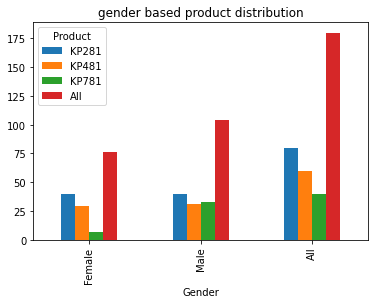

In [36]:
pd.crosstab(df['Gender'], df['Product'],margins = True).plot(kind = 'bar')
plt.title("gender based product distribution")
plt.show()

Equal number of customers who purchased KP281 were Male as well as Female.
Number of customers who purchased KP281 were more Males than Females.
There are considerably more Males than there are Females who purchased KP781.

Actually most females go for entry level treadmill and very few for advance level but there are males more for entry level treadmill but also equally distributed over medium and advance level treadmill.

In [37]:
(pd.crosstab(df['Product'], df['Gender'], margins=True, normalize='columns'))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


In [38]:
pd.crosstab(df['Gender'], df['Fitness'], margins = True)

Fitness,1,2,3,4,5,All
Gender,,,,,,
Female,1,16,45,8,6,76
Male,1,10,52,16,25,104
All,2,26,97,24,31,180


<AxesSubplot:xlabel='Gender'>

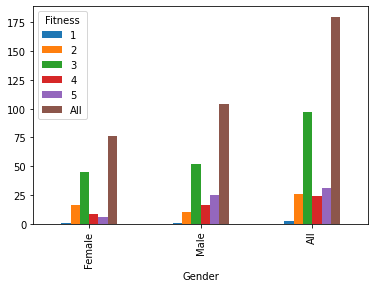

In [39]:
pd.crosstab(df['Gender'], df['Fitness'], margins = True).plot(kind = 'bar')

We can infer from here that most medium level fitness male and female they find the ideal fitness achievement possible so trying hard to achive.
So forms the main customer base of our company.

In [40]:
pd.crosstab(df['Product'], df['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


<AxesSubplot:xlabel='Product'>

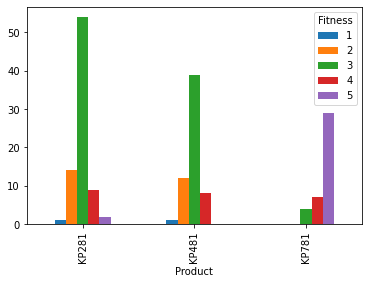

In [41]:
pd.crosstab(df['Product'], df['Fitness']).plot(kind = 'bar')

from here we can infer that most fit people are the users of advanced KP781 product. 
And medium fitness level prefers both Entry level KP281 and KP481 product. 

In [42]:
pd.crosstab(df['Product'], df['MaritalStatus'],margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


<AxesSubplot:xlabel='Product'>

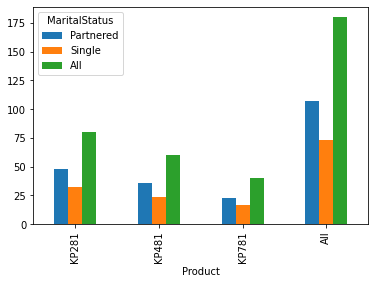

In [43]:
pd.crosstab(df['Product'], df['MaritalStatus'],margins = True).plot(kind = "bar")

Use of any product is more with partnered people than single.

In [44]:
pd.crosstab(df['Product'], df['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


And mostly already fit people having fitness rated 5 go for the advanced treadmill KP781 and are very counsious about the maintenance of their fitness. 

# Visual Analysis - Univariate & Bivariate (30 Points) For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points) For categorical variable(s): Boxplot (10 Points) For correlation: Heatmaps, Pairplots(10 Points)

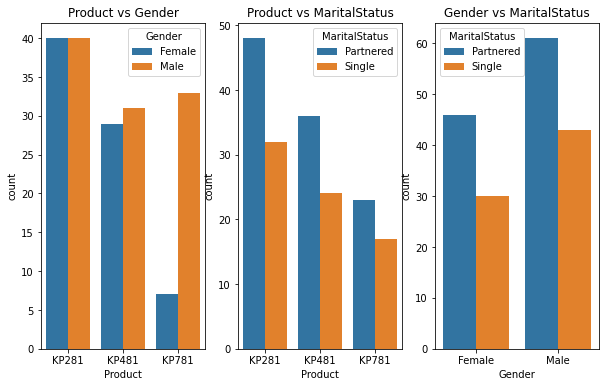

In [45]:
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (10,6))
sns.countplot(x = "Product", hue ="Gender", data = df, ax=axis[0])
sns.countplot(x = "Product", hue ="MaritalStatus", data = df, ax=axis[1])
sns.countplot(x = "Gender", hue ="MaritalStatus", data = df, ax=axis[2])
axis[0].set_title("Product vs Gender")
axis[1].set_title("Product vs MaritalStatus")
axis[2].set_title("Gender vs MaritalStatus")
plt.show()

It can be seen that entry level treadmill KP281 is convinient for both male and Female equally
but advanced lenvel treadmill KP781 is mostly good with Male.
Also from the second plot it is seen that treadmill users are more partnered than single.
It shows one of the fact that after marriage people become shapeless and there is more need look after self maintenance. Especially women after marriage and pregnancy gain more weight which need to be taken care once out of that phase.
Third plot shows that more Male and Female more partnered are using the product.Where as Single male also looks health Conscious.

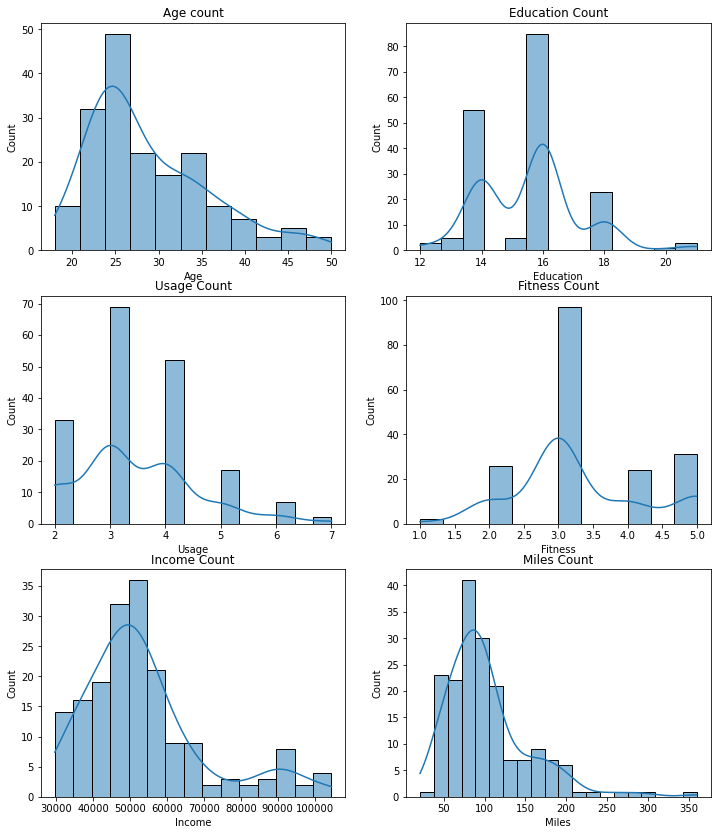

In [46]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
axis[0,0].set_title("Age count")
axis[0,1].set_title("Education Count")
axis[1,0].set_title("Usage Count")
axis[1,1].set_title("Fitness Count")
axis[2,0].set_title("Income Count")
axis[2,1].set_title("Miles Count")

plt.show()


We can see that except Fitness and education all other histograms are mostly left skewed.

In [47]:
#Now to check for the outliers

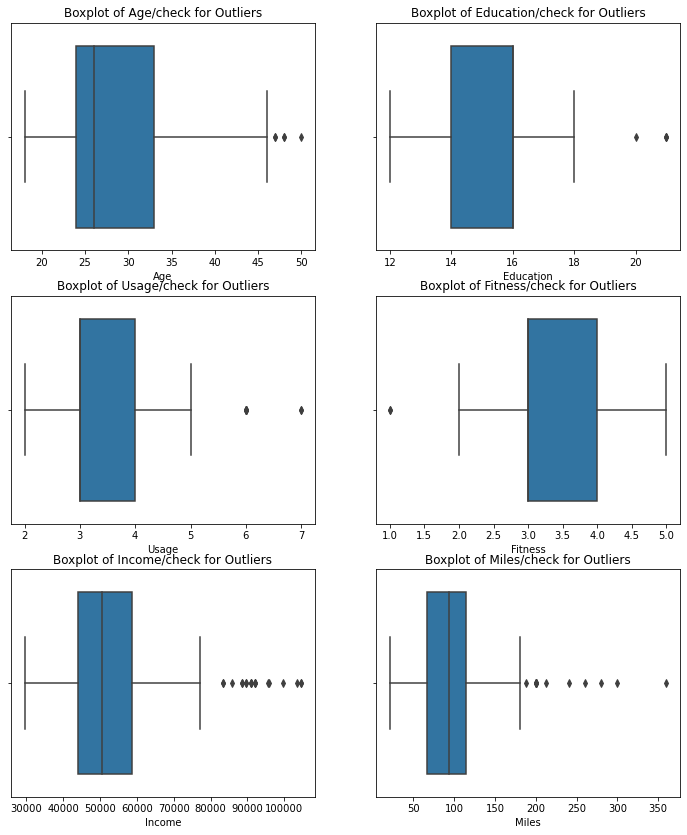

In [48]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
axis[0,0].set_title("Boxplot of Age/check for Outliers")
axis[0,1].set_title("Boxplot of Education/check for Outliers")
axis[1,0].set_title("Boxplot of Usage/check for Outliers")
axis[1,1].set_title("Boxplot of Fitness/check for Outliers")
axis[2,0].set_title("Boxplot of Income/check for Outliers")
axis[2,1].set_title("Boxplot of Miles/check for Outliers")
plt.show()

Obervation
Even from the boxplots it is quite clear that:

Age, Education, fitness and Usage are having very few outliers.
While Income and Miles are having more outliers.

As we can see there are more Outliers in Income and Miles
So using IQR method :

In [49]:
df[['Income']].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [50]:
Q1 = df[['Income']].quantile(0.25)

In [51]:
Q3 = df[['Income']].quantile(0.75)

In [52]:
IQR = Q3 -Q1

In [53]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [54]:
lower_limit

Income    22144.875
dtype: float64

In [55]:
upper_limit

Income    80581.875
dtype: float64

In [56]:
df_new = df[(df["Income"] < upper_limit.values[0]) & (df["Income"] > lower_limit.values[0])]
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,Age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18_to_25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18_to_25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18_to_25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18_to_25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,OK,Youth(18_to_25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170,Excellent,Youth(18_to_25),High Usage,42.50
157,KP781,26,Female,21,Single,4,3,69721,100,Average,Grown Ups(26_to_40),High Usage,25.00
158,KP781,26,Male,16,Partnered,5,4,64741,180,Good,Grown Ups(26_to_40),High Usage,36.00
163,KP781,28,Male,18,Partnered,7,5,77191,180,Excellent,Grown Ups(26_to_40),High Usage,25.71


161/180

Hence Data loss = 100 - 0.8944444444444445 

In [57]:
100 - 0.8944444444444445 

99.10555555555555

In [58]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,Age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18_to_25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18_to_25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18_to_25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18_to_25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,OK,Youth(18_to_25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26_to_40),High Usage,33.33
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40_to_58),High Usage,40.00
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40_to_58),High Usage,32.00
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40_to_58),High Usage,30.00


To check for the outliers boxplot is plotted of all the Numerical fields. There are few outliers present in Age,
Education, Usage and fitness but some more present in other 2. Those are Income and Miles.
There are 3 methods to deal with outliers.
1.drop them  
2.clip the values method : 
Means taking Q1 Q3 IQR get upper limit and lower limit and replace values less than lower limit by lower limit and Values Greater than upper limit.
3.logarithmic method:
Take log of that particular field and replace each value with its logarithm.

But in this case the given Dataset is very small having only 180 rows.
Method 1: After dropping only 161 rows are left. So we have almost 12% of data loss.
Method 2: The data gets modified so cant come to accurate conclusions as values changed of income and miles.
Method 3: The data gets modified so cant explain it properly.
So no method is suitable to treat outlier in a small dataset.



# Method 1

<AxesSubplot:xlabel='Income'>

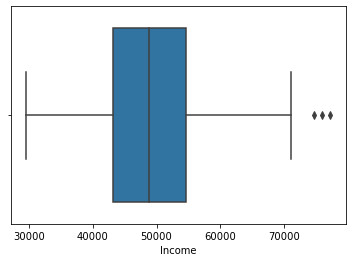

In [59]:
sns.boxplot(df_new["Income"])

Number of Outliers reduced

# Method 2 = clip the values -

<AxesSubplot:xlabel='Income'>

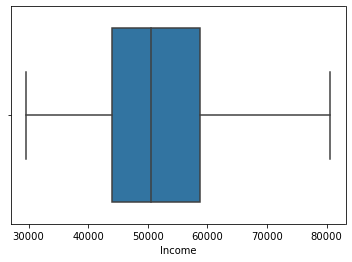

In [60]:
sns.boxplot(np.clip(df["Income"],lower_limit.values[0],upper_limit.values[0]))

In [61]:
lower_limit

Income    22144.875
dtype: float64

In [62]:
upper_limit

Income    80581.875
dtype: float64

Number of outliers removed totally but values of dataset get affected.

In [63]:
#Method 3 Log

<AxesSubplot:xlabel='Income'>

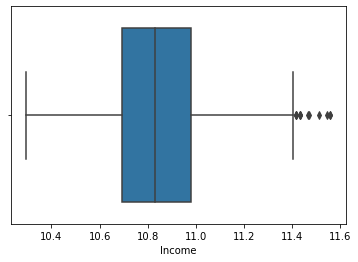

In [64]:
sns.boxplot(np.log(df["Income"]))

Number of outliers reduced and values of dataset get affected.

In [65]:
df_income = df.copy()
df_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,Age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18_to_25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18_to_25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18_to_25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18_to_25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,OK,Youth(18_to_25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26_to_40),High Usage,33.33
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40_to_58),High Usage,40.00
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40_to_58),High Usage,32.00
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40_to_58),High Usage,30.00


In [66]:
df_miles = df.copy()
df_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,Age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18_to_25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18_to_25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18_to_25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18_to_25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,OK,Youth(18_to_25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26_to_40),High Usage,33.33
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40_to_58),High Usage,40.00
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40_to_58),High Usage,32.00
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40_to_58),High Usage,30.00


In [67]:
IQR = np.percentile(df_miles["Miles"],75) - np.percentile(df_miles["Miles"],25)
Q3 = np.percentile(df_miles["Miles"],75)
Q1 = np.percentile(df_miles["Miles"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print("UpperWhisker:",UpperWhisker)
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

outlier_data = df_miles[df_miles["Miles"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

print()
print("Customers who run more than 187.875 (outliers).")
outlier_data["Product"].value_counts()

UpperWhisker: 187.875
Q1 = 66.0, Q3 = 114.75, IQR = 48.75
Outliers :  13

Customers who run more than 187.875 (outliers).


KP781    11
KP281     1
KP481     1
Name: Product, dtype: int64

In [68]:
IQR = np.percentile(df_income["Income"],75)-np.percentile(df_income["Income"],25)
Q3 = np.percentile(df_income["Income"],75)
Q1 = np.percentile(df_income["Income"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print("UpperWhisker:",UpperWhisker)
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
(df_income["Income"] > UpperWhisker).value_counts()


UpperWhisker: 80581.875
Q1 = 44058.75, Q3 = 58668.0, IQR = 14609.25


False    161
True      19
Name: Income, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Income'>

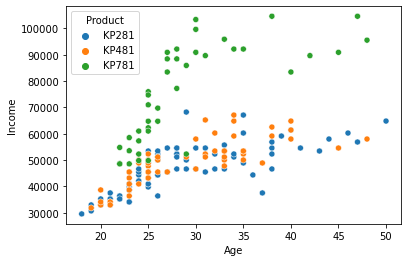

In [69]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df)

6. The variance of income in lower ages is smaller as compared to the variance in higher ages, In statistics, this is known as.. a) Heteroscedasticity b) Linearity c)Homoscedasticity d)Normality 

The answer to above question is a.Heteroscedasticity.
As in the above graph which is scatterplot against income and age , we can see that the distance between the points plotted is going away from a particular line in the opposite direction.


From this scatterplot we can infer that having higher income leads the purchase of the most expensive treadmill KP781

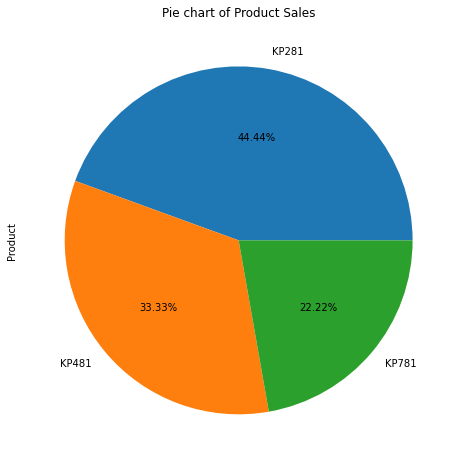

In [70]:
#Univariate Analysis
#categorical variables 
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

In [71]:
#For correlation Heatmaps and pairplots

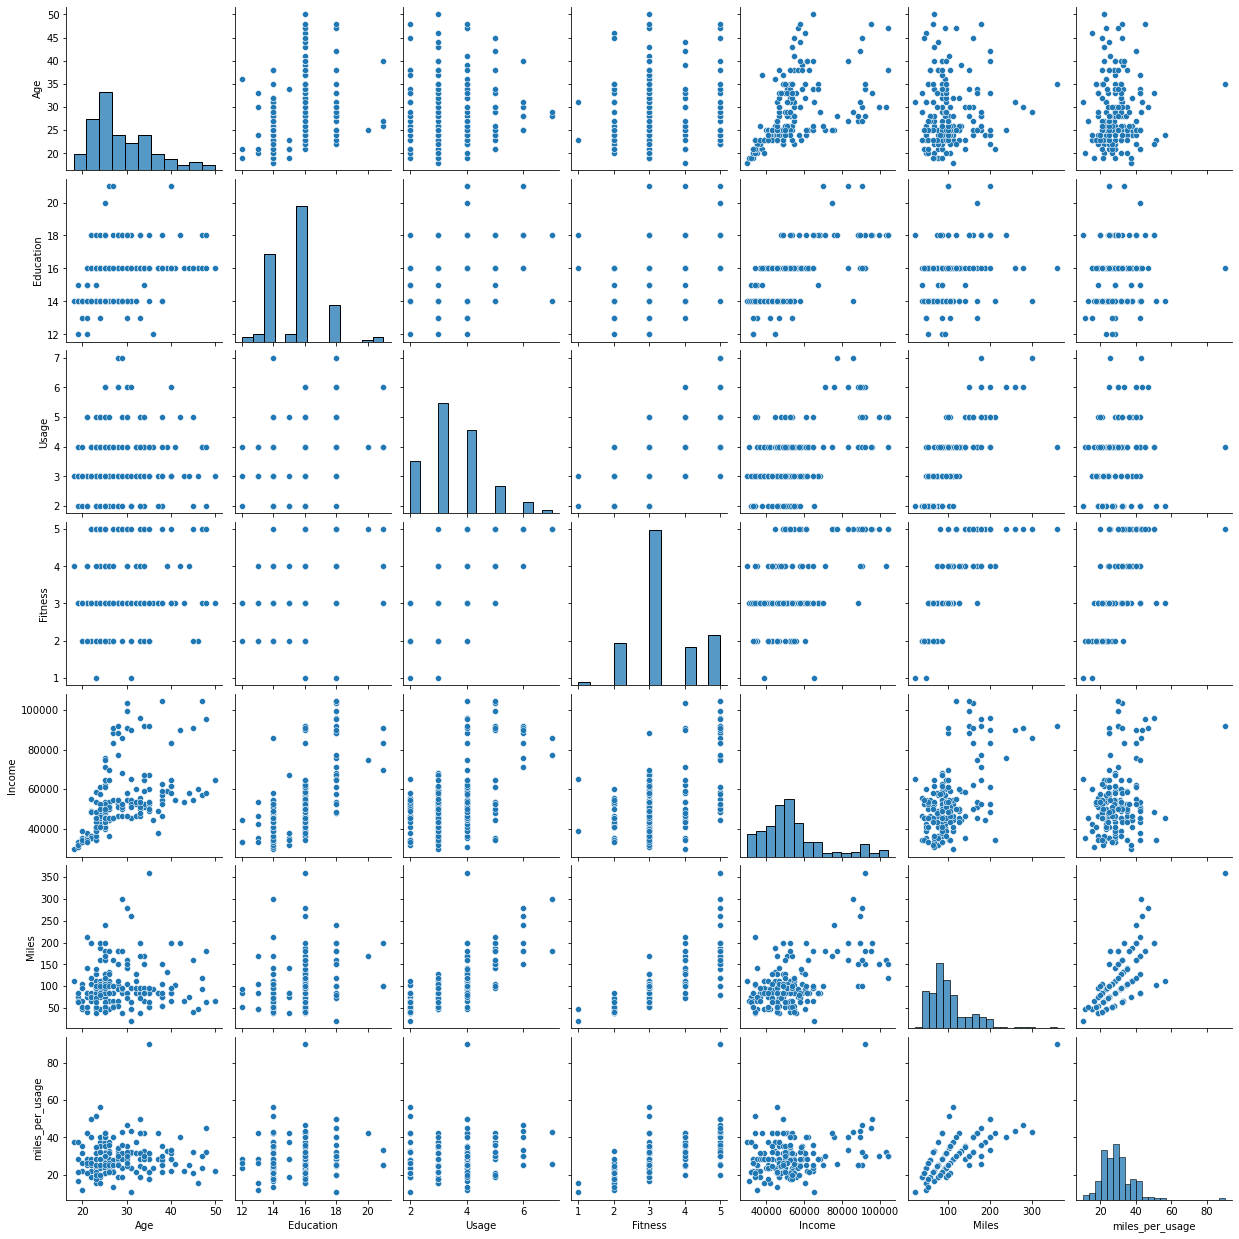

In [72]:
sns.pairplot(df)

In [73]:
from sklearn.preprocessing import LabelEncoder  
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder 
df['Product_encoded'] = labelencoder.fit_transform(df['Product']) #fitting and transforming the desired categorical column. 
df['MaritalStatus_encoded'] = labelencoder.fit_transform(df['MaritalStatus']) #fitting and transforming the desired categorical column. 
df['Gender_encoded'] = labelencoder.fit_transform(df['Gender']) #fitting and transforming the desired categorical column. 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Product                180 non-null    category
 1   Age                    180 non-null    int64   
 2   Gender                 180 non-null    category
 3   Education              180 non-null    int64   
 4   MaritalStatus          180 non-null    category
 5   Usage                  180 non-null    int64   
 6   Fitness                180 non-null    int64   
 7   Income                 180 non-null    int64   
 8   Miles                  180 non-null    int64   
 9   fitness_type           180 non-null    category
 10  Age_category           180 non-null    category
 11  Usage_type             180 non-null    category
 12  miles_per_usage        180 non-null    float64 
 13  Product_encoded        180 non-null    int32   
 14  MaritalStatus_encoded  180 non-null    int

In [75]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,miles_per_usage,Product_encoded,MaritalStatus_encoded,Gender_encoded
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.012687,0.032225,-0.192152,0.027544
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.069550,0.495018,-0.068569,0.094089
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.156524,0.537447,0.007786,0.214424
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.557918,0.594883,0.050751,0.254609
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.267170,0.624168,-0.150293,0.202053
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.734783,0.571596,-0.025639,0.217869
miles_per_usage,0.012687,0.069550,0.156524,0.557918,0.267170,0.734783,1.000000,0.316037,-0.002874,0.121346
Product_encoded,0.032225,0.495018,0.537447,0.594883,0.624168,0.571596,0.316037,1.000000,0.017602,0.230653
MaritalStatus_encoded,-0.192152,-0.068569,0.007786,0.050751,-0.150293,-0.025639,-0.002874,0.017602,1.000000,0.018836
Gender_encoded,0.027544,0.094089,0.214424,0.254609,0.202053,0.217869,0.121346,0.230653,0.018836,1.000000


<AxesSubplot:>

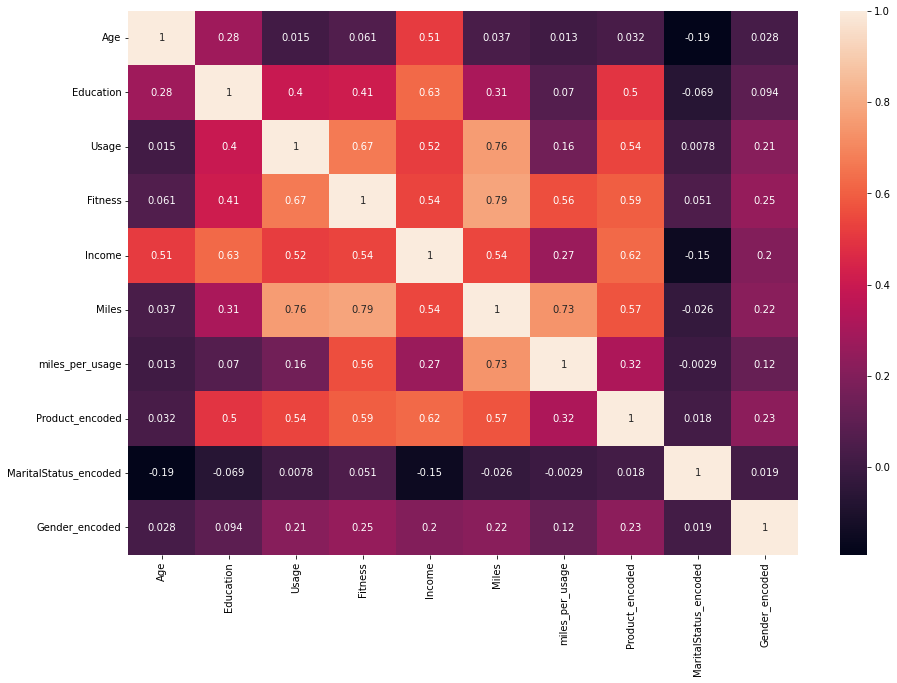

In [76]:






sns.heatmap(df.corr(), annot = True)

3. Name the top 3 features having the highest correlation with the 'Product' column. Also, provide possible reasons behind those correlations. 
As the correlation asked is a category field. So first converting it to the Numerical one using Label encoder and naming new columns as Product_encoded , Gender_encoded, MaritalStatus_encoded.
Income:(0.62) The purchase of Product depends upon Income . As to purchase something the base pay is important factor. 
Fitness: (0.59)Actually health conscious people only buy the product. As they know the importance of health so invest money in such kind of product. (Treadmill)
Miles : (0.57) Most people don't get time to go for a walk outside due to their busy schedule. But many of them can get some time to use treadmill and walk inside house. As a result Miles is also one of the reason of correlation with the product.

Conditional Probabilities
Probability of each product given gender

In [77]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Probability of each product given MaritalStatus

In [78]:
def p_prod_given_mstatus(MaritalStatus, print_marginal=False):
    if MaritalStatus != "Single" and MaritalStatus != "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][MaritalStatus] / df1.loc[MaritalStatus].sum()
    p_481 = df1['KP481'][MaritalStatus] / df1.loc[MaritalStatus].sum()
    p_281 = df1['KP281'][MaritalStatus] / df1.loc[MaritalStatus].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{MaritalStatus}): {p_781:.2f}")
    print(f"P(KP481/{MaritalStatus}): {p_481:.2f}")
    print(f"P(KP281/{MaritalStatus}): {p_281:.2f}\n")
    
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



Checking if following features have any effect on the product purchased:
Age
Education
Usage
Fitness
Income
Miles

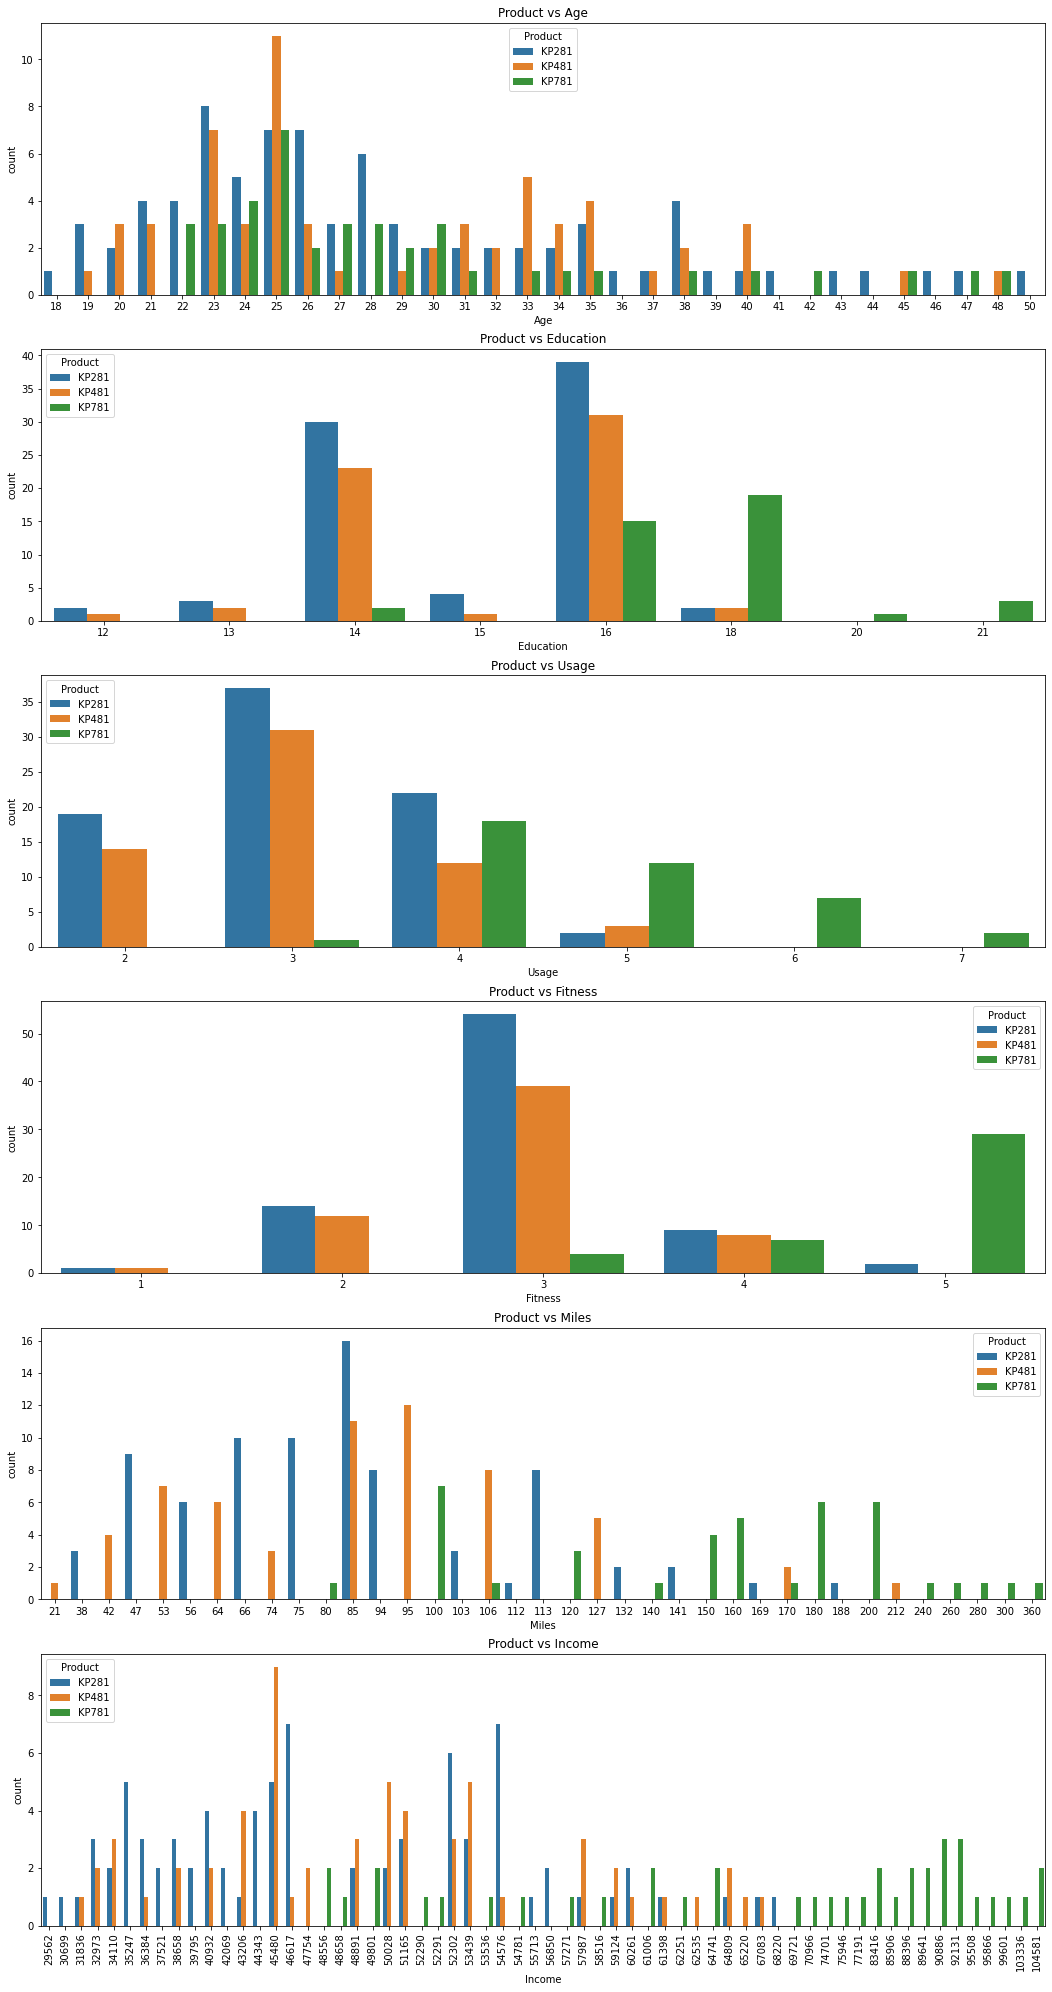

In [79]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Miles', 'Income']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(18, 35))
count = 0
for i in range(6):
    for j in range(1):
        #sns.countplot()
        sns.countplot(x = attrs[count], hue ="Product", data = df, ax=axs[i])
        #sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j])
        axs[i].set_title(f"Product vs {attrs[count]}")
        plt.xticks(rotation = 'vertical')
        count += 1

Observations:
Product vs Age:
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product

Product vs Education:
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

Product vs Usage:
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.

Product vs Fitness:
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

Product vs Income:
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

Product vs Miles:
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

All the Business Insights already mentioned above after each and every analysis done.

# Recommendations:


1.KP281 = entry level treadmill , cheapest 1500$
Recommend to the both male and female, having average to low shape 1-3, to both male and female of age ranging from 18 - 50. Suitable for all having medium salary too and On an average usage of 3days per week.
Can be convient to use for lowest fitness too as to start wwith getting to fit and whith the lowest value.
who are comfortable in walking miles around 82.5km per week
This product can be recommended to most i.e. 45% adult population 

2.KP481 = Medium level treadmill, 1750$
Can be recommended to male as well as female.who are having average fitness around 3 and age range 19 to 48. Having more than the average salary. average usage sould be 3 days per week. Can walk\run around 88 miles per week. 

3.KP781 = Advanced level treadmill, most expensive 2500$
Recommend to mosly youth population. Having higher income and are more fit and cauncious even more about ther personality and health. Who give more time on an average 4 days per week and mostly males as extreme workout is not familier with most of the women. So not to recoomend for common women but atheletes, yoga or having any health and figure related backgroud or profession. Those women can go for this. Customers having Higher usage and higher income as well as higher fitness are most likely to buy 781. So for this type of customer base recommend advanced treadmill.